In [210]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


%matplotlib inline

plt.rc('axes', labelsize=20) 
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13) 
mpl.rcParams['axes.titlesize'] = 24

In [164]:
resultados_eleicoes_df = pd.read_csv('data/raw_data/ResultadosEleicoesAutarquicas2013.csv')

In [155]:
# I only want the results referring to the "Câmara municipal" elections. 
resultados_cm_df = resultados_eleicoes_df.ix[resultados_eleicoes_df.Orgao == 'CM']
resultados_cm_df = resultados_cm_df.drop('Orgao', 1)

# Because of the last filtering the Freguesia column will always be null, so I can drop it. 
resultados_cm_df = resultados_cm_df.drop('Freguesia', 1)

# Also dropping "dsc_municipio" column because it is redudant, always having the same value as 
# the "Concelho" column
resultados_cm_df = resultados_cm_df.drop('dsc_municipio', 1)

# I don't know what DICOFR stands for but it seems redudant with Ref_Municipio_INE
resultados_cm_df = resultados_cm_df.drop(resultados_cm_df.columns[0], 1)

# Create %Abstention Column
resultados_cm_df['Abstention (%)'] = 100 - ((resultados_cm_df.Votantes / resultados_cm_df.Inscritos) * 100)

In [156]:
# Make column names more understandable 
resultados_cm_df = resultados_cm_df.rename(columns={
                        'Ref_Municipio_INE': 'INE_ID',
                        'Percentagem': 'Votos (%)',
                        'M': 'Mandatos'
                    })
resultados_cm_df = resultados_cm_df.set_index('INE_ID')

# General Data exploration

In [157]:
# Number of Concelhos: 308
number_of_concelhos = len(resultados_cm_df['Concelho'].unique())

In [225]:
resultados_cm_df.sort_index()

,Concelho,Inscritos,Votantes,Brancos,Nulos,Sigla,Votos,Votos (%),Mandatos,Tipo,Abstention (%)
INE_ID,,,,,,,,,,,
101,ÁGUEDA,43763,23373,1040.0,556,PS,13715.0,"62,98",5.0,Partido,46.591870
101,ÁGUEDA,43763,23373,1040.0,556,PCP-PEV,918.0,"4,22",0.0,Coligação,46.591870
101,ÁGUEDA,43763,23373,1040.0,556,PPD/PSD.CDS-PP,7144.0,"32,81",2.0,Coligação,46.591870
102,ALBERGARIA-A-VELHA,22811,13110,387.0,275,PCP-PEV,379.0,"3,04",0.0,Coligação,42.527728
102,ALBERGARIA-A-VELHA,22811,13110,387.0,275,PS,1307.0,"10,5",0.0,Partido,42.527728
102,ALBERGARIA-A-VELHA,22811,13110,387.0,275,PPD/PSD,4858.0,"39,03",3.0,Partido,42.527728
102,ALBERGARIA-A-VELHA,22811,13110,387.0,275,CDS-PP,5701.0,"45,8",4.0,Partido,42.527728
102,ALBERGARIA-A-VELHA,22811,13110,387.0,275,B.E.,203.0,"1,63",0.0,Partido,42.527728
103,ANADIA,28424,15394,586.0,424,CDS-PP,556.0,"3,87",0.0,Partido,45.841542


# Analyse enrolled electors

In [158]:
eloctors_by_concelho = resultados_cm_df[['Concelho', 'Inscritos']].drop_duplicates()
assert len(eloctors_by_concelho) == 308

In [159]:
# Top 10 Conselhos with most people enrolled to vote
eloctors_by_concelho.sort_values(by='Inscritos', ascending=False)[0:10]

,Concelho,Inscritos
INE_ID,,
1106,LISBOA,508847
1111,SINTRA,304080
1317,VILA NOVA DE GAIA,260984
1312,PORTO,219946
1105,CASCAIS,172537
1107,LOURES,166196
303,BRAGA,159313
1308,MATOSINHOS,150242
1503,ALMADA,149539


In [160]:
# Top 10 Conselhos with least people enrolled to vote. Wow, only 356 in Corvo.
eloctors_by_concelho.sort_values(by='Inscritos')[0:10]

,Concelho,Inscritos
INE_ID,,
4901,CORVO,356
4801,LAJES DAS FLORES,1302
204,BARRANCOS,1437
4802,SANTA CRUZ DAS FLORES,1938
203,ALVITO,2012
708,MOURÃO,2389
1202,ARRONCHES,2755
1211,MONFORTE,2818
802,ALCOUTIM,2833


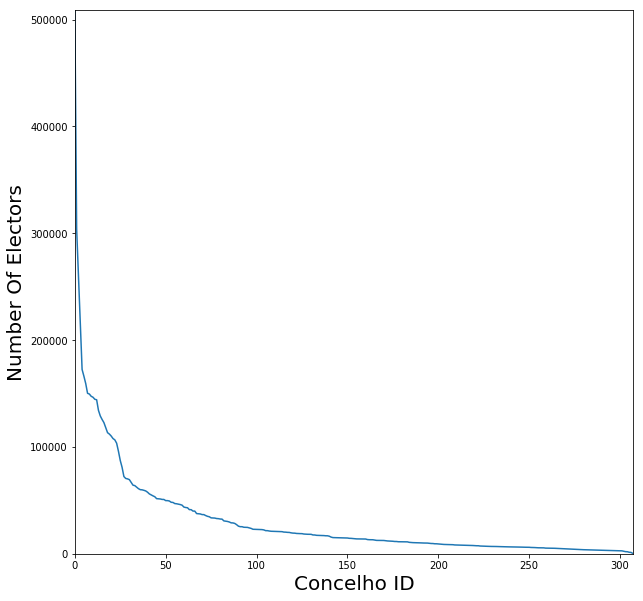

In [171]:
# What happens if I plot the number of electors by concelho, in desceding order?
eloctors_by_concelho_plot = eloctors_by_concelho['Inscritos'].sort_values(ascending=False).plot(use_index=False, ylim=(0,508847))
eloctors_by_concelho_plot.set_xlabel('Concelho ID')
eloctors_by_concelho_plot.set_ylabel('Number Of Electors')

### Cool, seems like the number of of electors by concelho follows a power law.

# Analyse Abstention

### Check relationship between number of people enrolled to vote and abstention

In [186]:
enrolled_abstention = resultados_cm_df.ix[:, ['Inscritos', 'Abstention (%)']].drop_duplicates()

Correlation Cofficient: 0.453047145972
p-value: 5.4002095121e-17


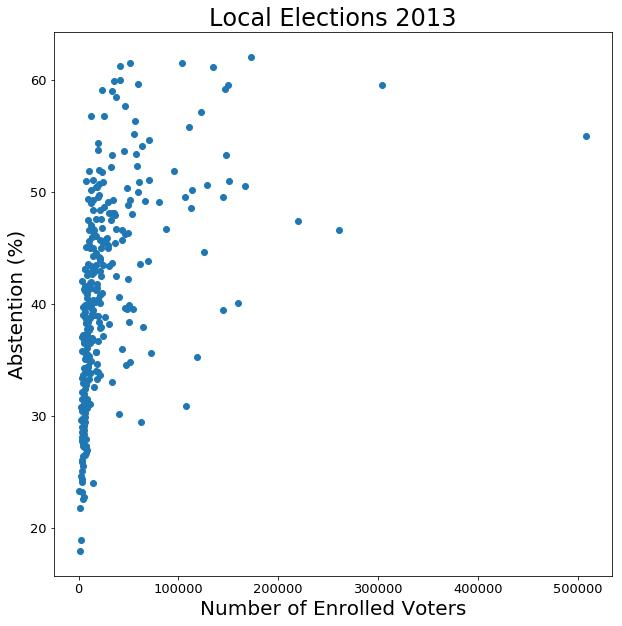

In [211]:
# Correlation using all the data
plot = plt.scatter(enrolled_abstention.Inscritos, enrolled_abstention['Abstention (%)'])
plt.xlabel('Number of Enrolled Voters')
plt.ylabel('Abstention (%)')
plt.title('Local Elections 2013')

# Pearson Correlation Coefficient and p-value
corr_cof, p_value = pearsonr(enrolled_abstention.Inscritos, enrolled_abstention['Abstention (%)'])
print 'Correlation Cofficient: {}'.format(corr_cof)
print 'p-value: {}'.format(p_value)

Correlation Cofficient: 0.69994788675
p-value: 1.20211071448e-46


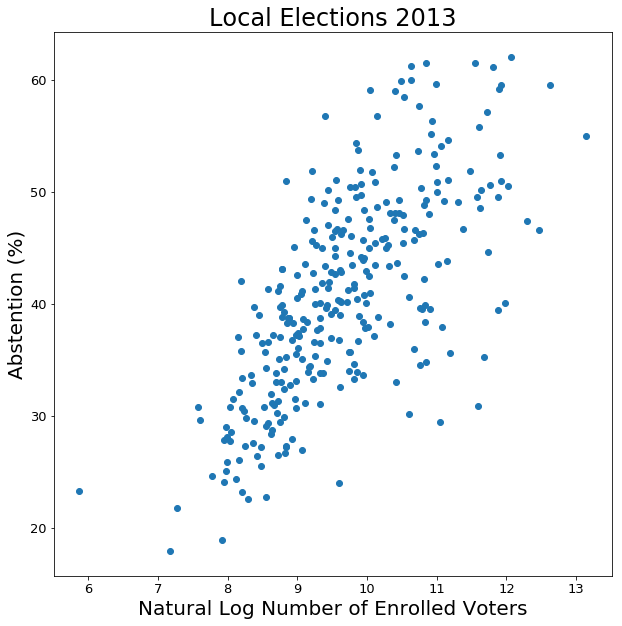

In [212]:
# What if I used the log of the Number of Enrolled Voters?
plot = plt.scatter(np.log(enrolled_abstention.Inscritos), enrolled_abstention['Abstention (%)'])
plt.xlabel('Natural Log Number of Enrolled Voters')
plt.ylabel('Abstention (%)')
plt.title('Local Elections 2013')

# Pearson Correlation Coefficient and p-value
corr_cof, p_value = pearsonr(np.log(enrolled_abstention.Inscritos), enrolled_abstention['Abstention (%)'])
print 'Correlation Cofficient: {}'.format(corr_cof)
print 'p-value: {}'.format(p_value)